In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import koreanize_matplotlib
from matplotlib.pyplot import axhline

df_kospi = pd.read_csv('Data/KOSPI.csv', index_col='Date')
df_kospi.head()

,Close
Date,
2020-01-02,2175.17
2020-01-03,2176.46
2020-01-06,2155.07
2020-01-07,2175.54
2020-01-08,2151.31


### 시각화 - Simple Line Graph

<Axes: xlabel='Date'>

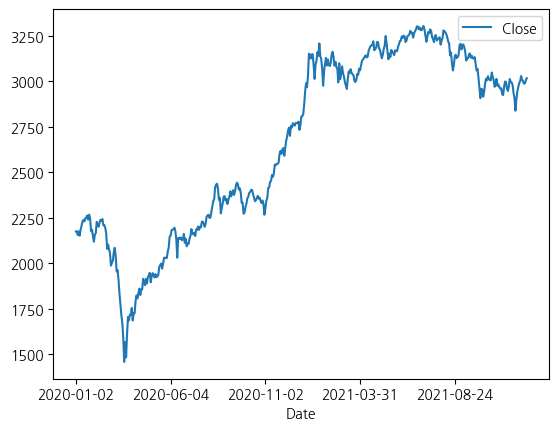

In [2]:
df_kospi.plot()

<Figure size 640x480 with 0 Axes>

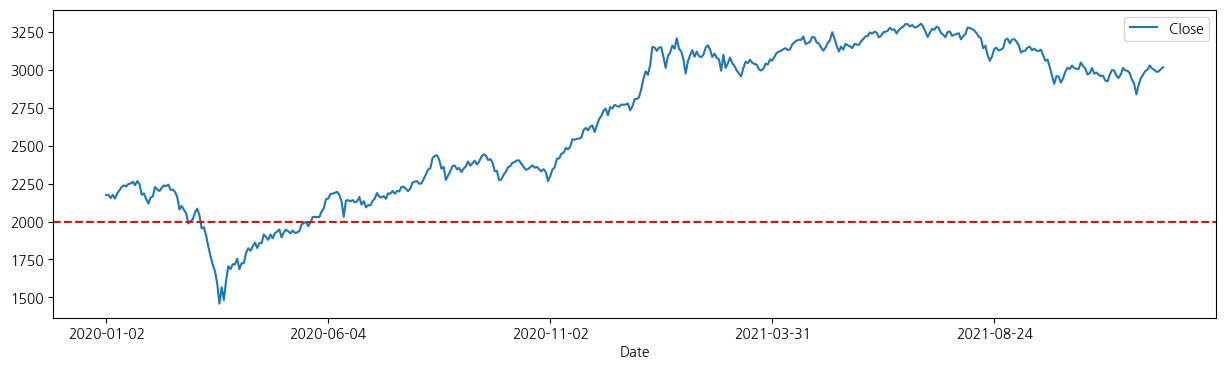

In [3]:
plt.figure() 
df_kospi.plot(figsize=(15, 4))
plt.axhline(y=2000, linestyle="--", color='red')
plt.show()

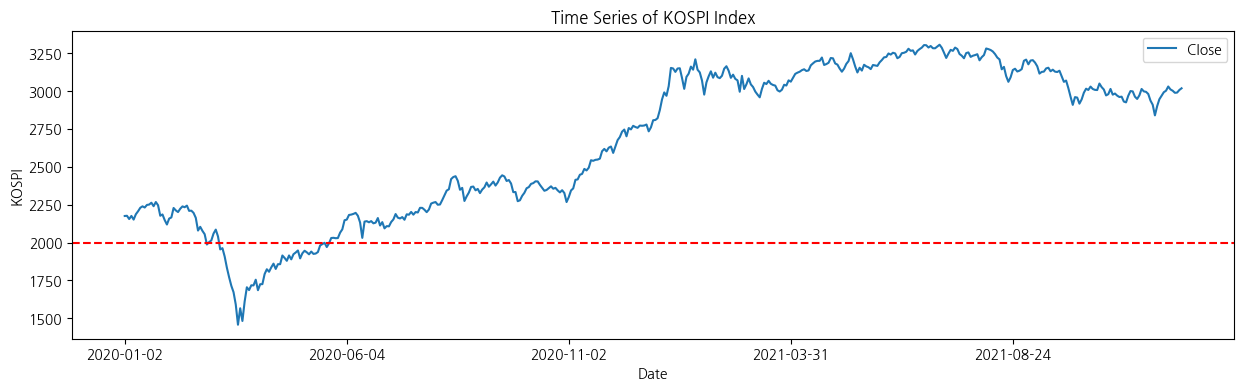

In [4]:
fig, ax = plt.subplots()
df_kospi.plot(kind="line", ax=ax, figsize=(15, 4))
ax.axhline(y=2000, linestyle="--", color='red')
ax.set(xlabel = 'Date', ylabel = 'KOSPI', title = 'Time Series of KOSPI Index')
plt.show()

### 시각화 - 두 개 이상의 그래프

In [5]:
df_samsung = pd.read_excel('Data/samsung_naver_excel.xlsx', index_col='Date', sheet_name=0)
df_samsung.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919


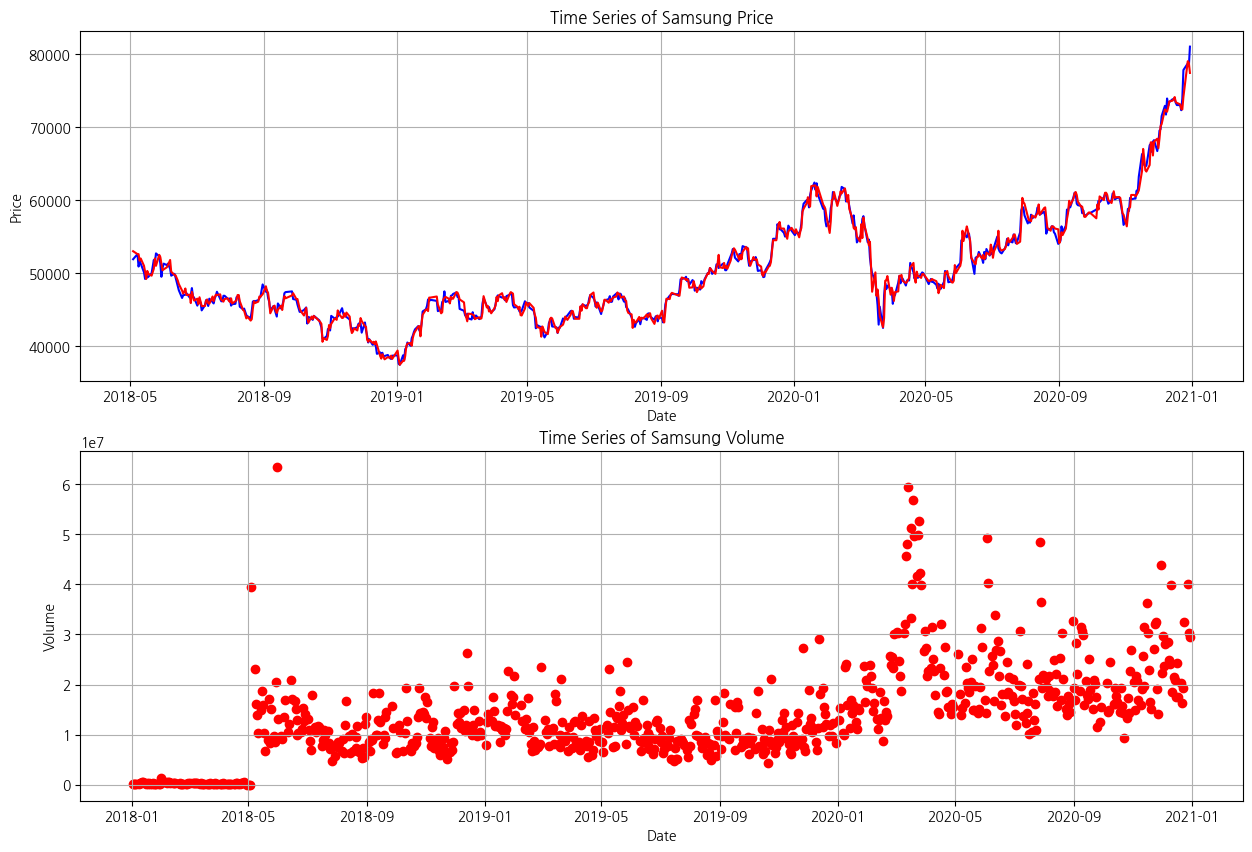

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

axs[0].plot(df_samsung['Close']['2018-05-04':], color="blue")
axs[0].plot(df_samsung['Open']['2018-05-04':], color="red")
axs[0].grid(True)
axs[0].set(xlabel="Date", ylabel="Price", title='Time Series of Samsung Price')

axs[1].scatter(df_samsung.index, df_samsung['Volume'], color="red")
axs[1].grid(True)
axs[1].set(xlabel="Date", ylabel="Volume", title='Time Series of Samsung Volume')

plt.show()

### 시각화 - Option

In [7]:
plt.rcParams['figure.figsize'] = (20, 14)
plt.rcParams['font.size'] = 15

df_samsung = pd.read_excel('Data/samsung_kospi_excel.xlsx', index_col='Date', sheet_name=0)
df_samsung.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2016-01-04,25200,25200,24100,24100,306939,-0.043651
2016-01-05,24040,24360,23720,24160,216002,0.002490
2016-01-06,24160,24160,23360,23500,366752,-0.027318
2016-01-07,23320,23660,23020,23260,282388,-0.010213
2016-01-08,23260,23720,23260,23420,257763,0.006879


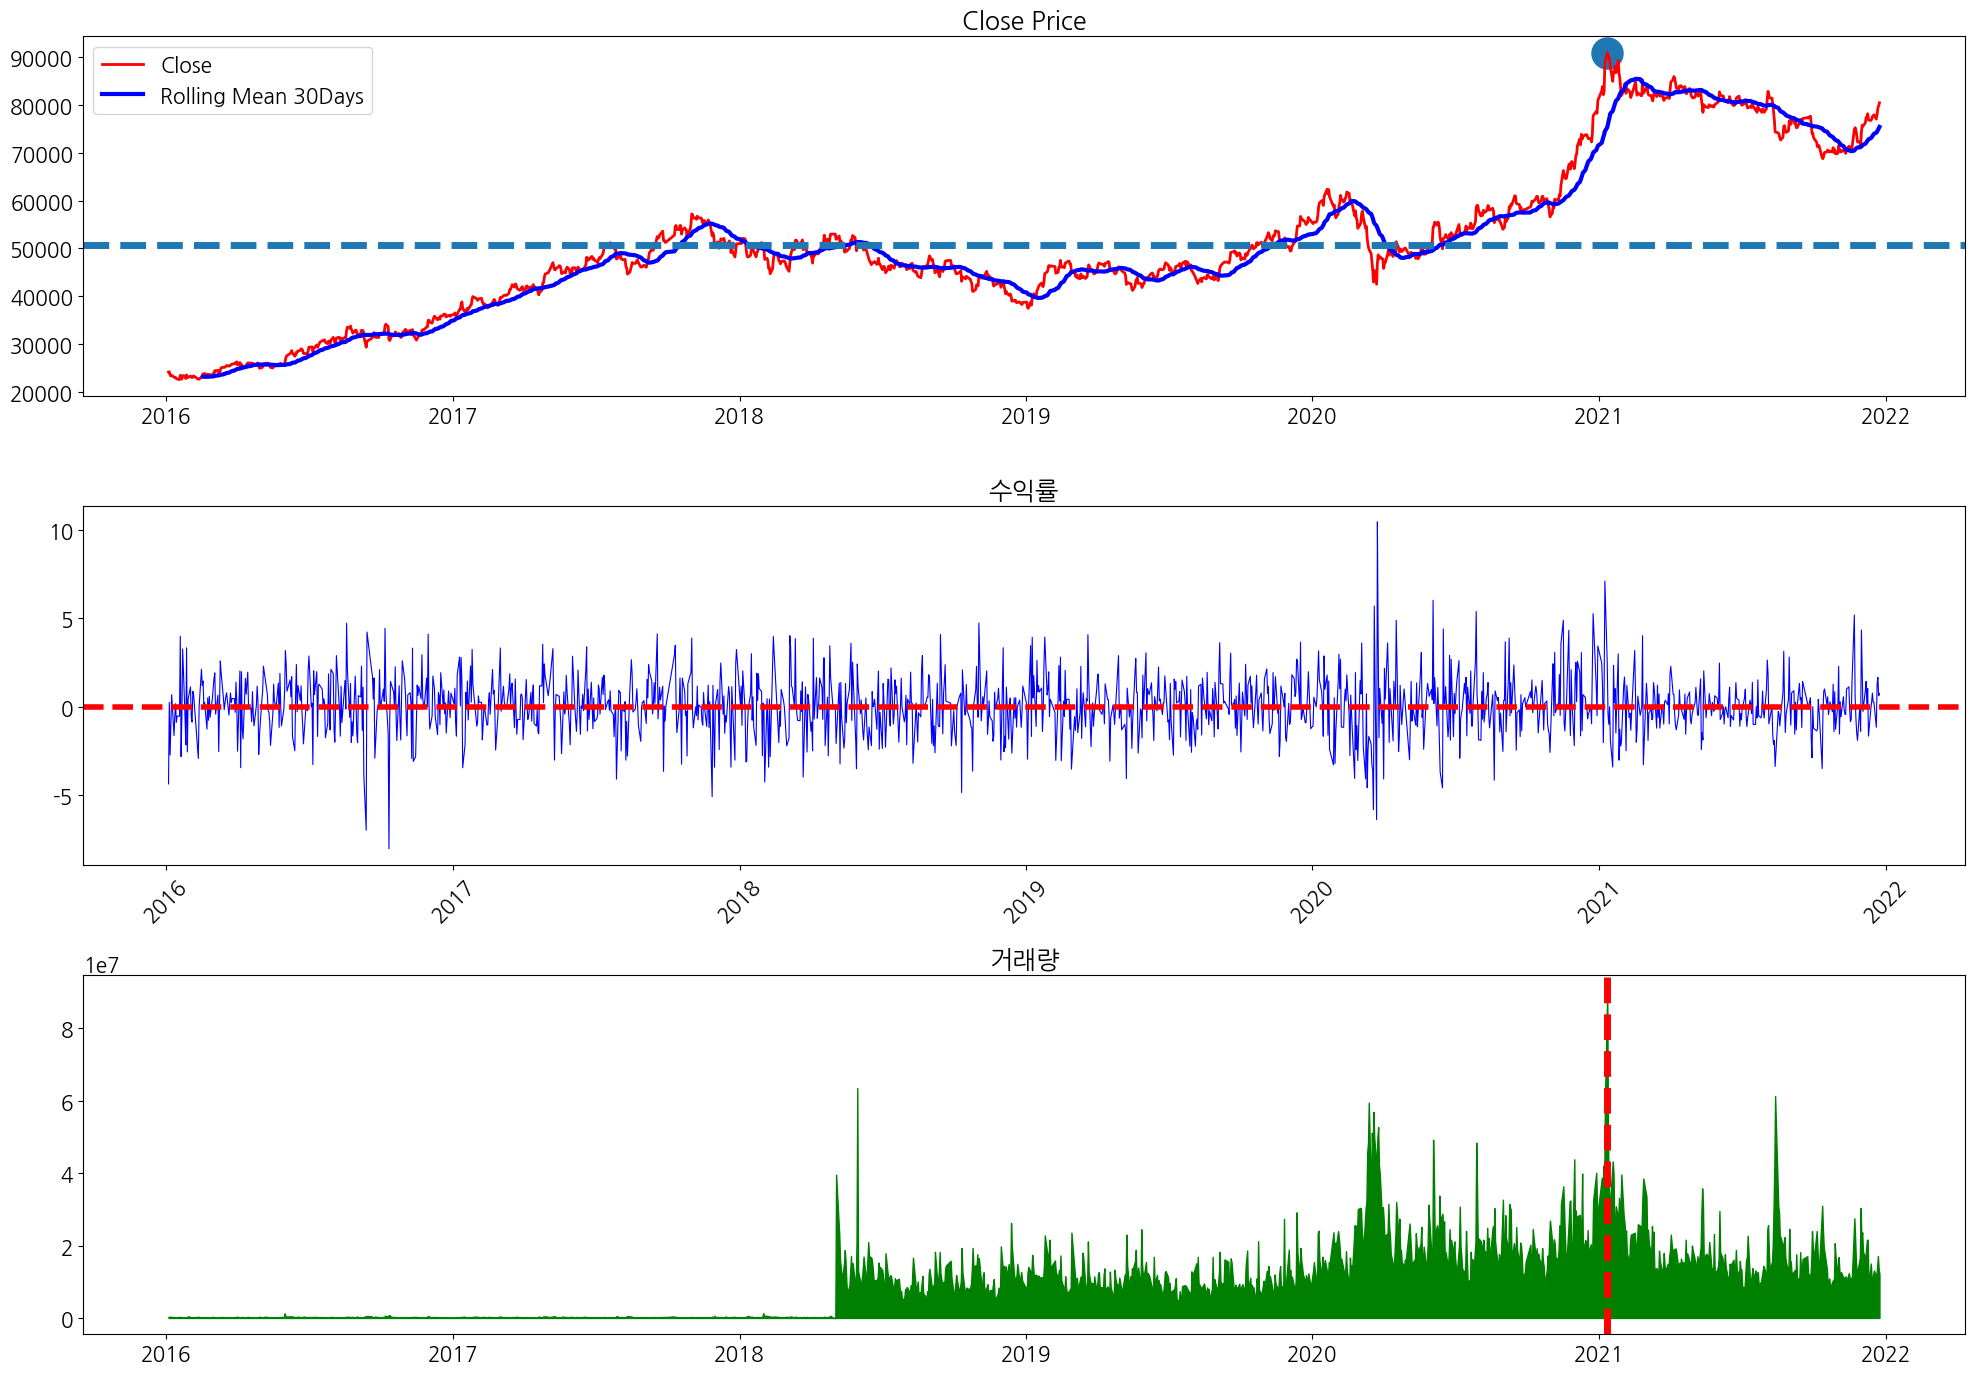

In [8]:
fig, axs = plt.subplots(3, 1, sharex=False)

axs[0].plot(df_samsung['Close'], color='red', linewidth=2)
axs[0].plot(df_samsung['Close'].rolling(window=30).mean(), color='blue', linewidth=3)
axs[0].axhline(df_samsung['Close'].mean(), linestyle='--', linewidth=5)
axs[0].scatter(df_samsung.index[df_samsung['Close'].argmax()], df_samsung['Close'].max(), s=500)
axs[0].legend(['Close', 'Rolling Mean 30Days'])
axs[0].set_title('Close Price')

axs[1].plot(df_samsung['Change'] * 100, color='blue', linewidth=0.8)
axs[1].axhline(0, linestyle='--', linewidth=4, color='red')
axs[1].tick_params(axis='x', labelrotation=45)
axs[1].set_title('수익률')

axs[2].fill_between(df_samsung.index, df_samsung['Volume'], color='green', alpha=1)
axs[2].axvline(df_samsung.index[df_samsung['Volume'].argmax()], color='red', linewidth=5, linestyle='--')
axs[2].set_title('거래량')

plt.tight_layout()
plt.show()

### 시각화 마무리 - 참고 라이브러리 소개

In [9]:
# Seaborn
# Plotly